# Sistemas Inteligentes

## Laboratório 3 - Redução de Dimensionalidade e Regressão

Algoritmos de Redução de dimensionalidade:
- Principal Component Analysis (PCA)
- Independent Component Analysis (ICA)
- Isometric Mapping (Isomap)
- T-Distributed Stochastic Neighbor Embedding (TSNE)

Modelos de regressão linear:
- Least Squares
- Ridge
- Lasso
- Lasso Least-angle regression (LARS)
- RANdom SAmple Consensus (RANSAC)
- Theil-Sen

### Identificação do Aluno

#### Nome Completo

Gabriel Mesquita de Souza

#### RA

11057015

## Importação e preparação dos dados

Importe o dataset de pacientes diabéticos da biblioteca Scikit (load_diabetes) e separe os dados entre atributos (X) e saídas (y).

In [1]:
from sklearn import datasets

In [2]:
diabets_set = datasets.load_diabetes(return_X_y=True)

In [3]:
X = diabets_set[0]

In [4]:
Y = diabets_set[1]

Mostre os formatos da variável de atributos e da variável de saídas.

In [5]:
X.shape

(442, 10)

In [6]:
Y.shape

(442,)

## Redução de Dimensionalidade

Importe e aplique as funções de redução de dimensionalidade (PCA, FastICA, Isomap e TSNE) para reduzir a dimensionalidade a apenas uma feature.

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA(n_components=1)

In [10]:
X_pca = pca.fit_transform(X, Y)

In [11]:
from sklearn.decomposition import FastICA

In [12]:
fast_ICA = FastICA(n_components=1)

In [13]:
X_fast_ICA = fast_ICA.fit_transform(X, Y)

In [14]:
from sklearn.manifold import Isomap

In [15]:
isomap = Isomap(n_components=1)

In [17]:
X_isomap = isomap.fit_transform(X, Y)

In [18]:
from sklearn.manifold import TSNE

In [19]:
tsne = TSNE(n_components=1)

In [20]:
X_tsne = tsne.fit_transform(X, Y)

Mostre o formato da nova variável de atributos após a redução de dimensionalidade para cada algoritmo.

In [21]:
X_pca.shape

(442, 1)

In [22]:
X_fast_ICA.shape

(442, 1)

In [23]:
X_isomap.shape

(442, 1)

In [24]:
X_tsne.shape

(442, 1)

### Caso mais simples

Faça a separação dos dados para treinamento e teste. Reserve 20% dos dados para teste.

In [25]:
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.20)

Importe o regressor linear e utilize-o para gerar um modelo, então faça uma regressão com os dados de teste.

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
LR = LinearRegression()

In [40]:
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
lr_pred = LR.predict(X_test)

Importe as funções de erro quadrático médio (MSE) e o coeficiente de determinação (R²), então imprima o MSE e o R².

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [43]:
mean_squared_error(y_test, lr_pred)

4104.531020989964

In [44]:
r2_score(y_test, lr_pred)

0.29731754225364737

Então exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada.

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

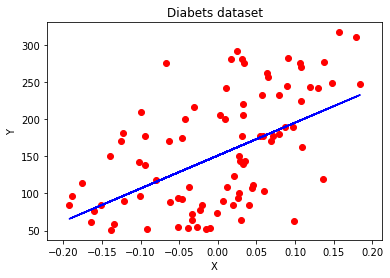

In [46]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, LR.predict(X_test), color = 'blue')
plt.title('Diabets dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Comparando Métodos de Redução de Dimensionalidade

Agora, a fim de comparar com outras técnicas, crie um método iterativo que realize as etapas de separação dos dados entre treinamento e teste, gere um modelo de regressão linear, faça a predição com base nos dados de testes e calcule o erro quadrático médio e o coeficiente de determinação para cada iteração. Então, calcule os valores mínimo, médio, máximo e desvio padrão para cada uma dessas duas métricas. Por fim, plote os histogramas (com 100 bins) das duas métricas. Use 10000 (dez mil) iterações.

#### PCA

In [57]:
import statistics

In [59]:
mean_squared_error_pca = []
r2_score_pca = []

for i in range(1, 10000):    
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, Y, test_size=0.20)
    
    LR.fit(X_train_pca, y_train_pca)
    
    y_pred_pca = LR.predict(X_test_pca)
    
    mean_squared_error_pca.append(mean_squared_error(y_test, y_pred_pca))
    r2_score_pca.append(r2_score(y_test, y_pred_pca))

In [60]:
min(mean_squared_error_pca)

5052.569775591097

In [61]:
min(r2_score_pca)

-0.8405545773950265

In [62]:
max(mean_squared_error_pca)

10751.105674349921

In [64]:
max(r2_score_pca)

0.13501636857138766

In [68]:
statistics.mean(mean_squared_error_pca)

7689.500601624087

In [69]:
statistics.mean(r2_score_pca)

-0.31641767450646857

In [71]:
statistics.stdev(mean_squared_error_pca)

742.051620935419

In [72]:
statistics.stdev(r2_score_pca)

0.1270368415068777

In [76]:
import random

No handles with labels found to put in legend.


Text(0, 0.5, 'Frequência')

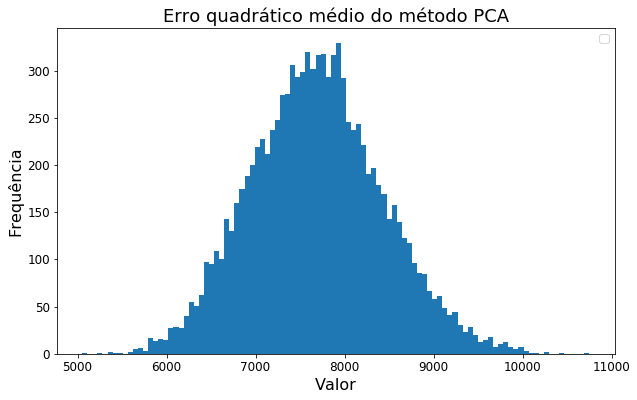

In [105]:
params = {'figure.figsize': [10, 6], 
          'axes.labelsize': 16,
          'axes.titlesize':18, 
          'font.size': 16,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 12
         }

plt.rcParams.update(params)

# Mean squared graph
plt.hist(mean_squared_error_pca, bins=100)
plt.legend()
plt.title('Erro quadrático médio do método PCA')
plt.xlabel('Valor')
plt.ylabel('Frequência')

No handles with labels found to put in legend.


Text(0, 0.5, 'Frequência')

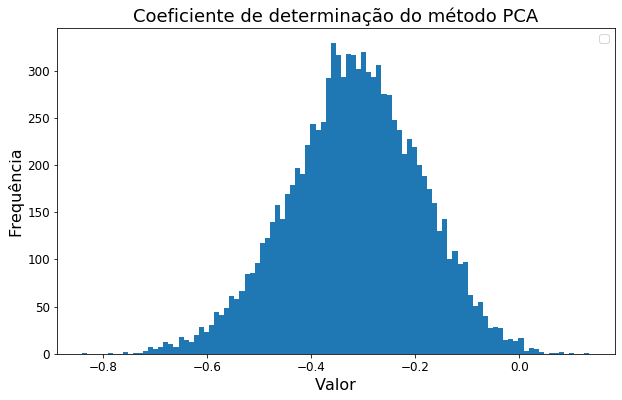

In [100]:
params = {'figure.figsize': [10, 6], 
          'axes.labelsize': 16,
          'axes.titlesize':18, 
          'font.size': 16,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 12
         }

plt.rcParams.update(params)

# R2 score graph
plt.hist(r2_score_pca, bins=100)
plt.legend()
plt.title('Coeficiente de determinação do método PCA')
plt.xlabel('Valor')
plt.ylabel('Frequência')

#### ICA

In [83]:
mean_squared_error_ica = []
r2_score_ica = []

for i in range(1, 10000):    
    X_train_ica, X_test_ica, y_train_ica, y_test_ica = train_test_split(X_fast_ICA, Y, test_size=0.20)
    
    LR.fit(X_train_ica, y_train_ica)
    
    y_pred_ica = LR.predict(X_test_ica)
    
    mean_squared_error_ica.append(mean_squared_error(y_test, y_pred_ica))
    r2_score_ica.append(r2_score(y_test, y_pred_ica))

In [84]:
min(mean_squared_error_ica)

5020.931126581198

In [85]:
min(r2_score_ica)

-0.8363328830667276

In [86]:
max(mean_squared_error_ica)

10726.445779769354

In [87]:
max(r2_score_ica)

0.14043280312441175

In [88]:
statistics.mean(mean_squared_error_ica)

7717.266610037237

In [89]:
statistics.mean(r2_score_ica)

-0.32117112549362975

In [90]:
statistics.stdev(mean_squared_error_ica)

749.1065198554493

In [92]:
statistics.stdev(r2_score_ica)

0.1282446174225494

No handles with labels found to put in legend.


Text(0, 0.5, 'Frequência')

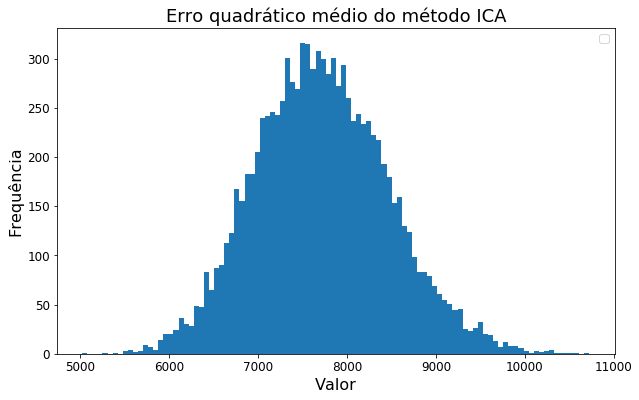

In [108]:
params = {'figure.figsize': [10, 6], 
          'axes.labelsize': 16,
          'axes.titlesize':18, 
          'font.size': 16,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 12
         }

plt.rcParams.update(params)

# Mean squared graph
plt.hist(mean_squared_error_ica, bins=100)
plt.legend()
plt.title('Erro quadrático médio do método ICA')
plt.xlabel('Valor')
plt.ylabel('Frequência')

No handles with labels found to put in legend.


Text(0, 0.5, 'Frequência')

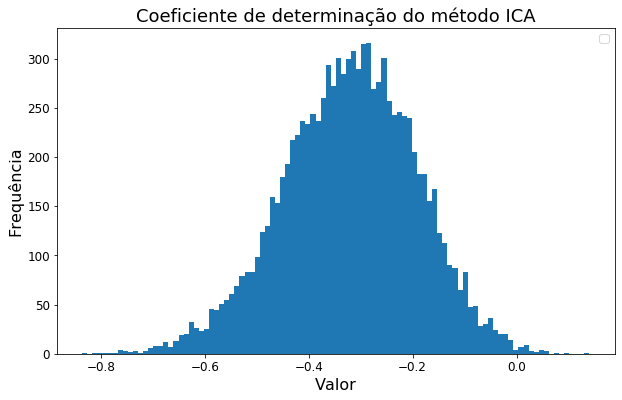

In [111]:
params = {'figure.figsize': [10, 6], 
          'axes.labelsize': 16,
          'axes.titlesize':18, 
          'font.size': 16,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 12
         }

plt.rcParams.update(params)

# R2 score graph
plt.hist(r2_score_ica, bins=100)
plt.legend()
plt.title('Coeficiente de determinação do método ICA')
plt.xlabel('Valor')
plt.ylabel('Frequência')

#### Isomap

In [113]:
mean_squared_error_isomap = []
r2_score_isomap = []

for i in range(1, 10000):    
    X_train_isomap, X_test_isomap, y_train_isomap, y_test_isomap = train_test_split(X_isomap, Y, test_size=0.20)    
    
    LR.fit(X_train_isomap, y_train_isomap)
    
    y_pred_isomap = LR.predict(X_test_isomap)
    
    mean_squared_error_isomap.append(mean_squared_error(y_test, y_pred_isomap))
    r2_score_isomap.append(r2_score(y_test, y_pred_isomap))

In [114]:
min(mean_squared_error_isomap)

5160.563125199756

In [115]:
min(r2_score_isomap)

-0.28546053033741114

In [116]:
max(mean_squared_error_isomap)

7508.672750917984

In [117]:
max(r2_score_isomap)

0.11652825581618886

In [118]:
statistics.mean(mean_squared_error_isomap)

6234.170131452471

In [119]:
statistics.mean(r2_score_isomap)

-0.06726979710372975

In [120]:
statistics.stdev(mean_squared_error_isomap)

316.1038327994196

In [121]:
statistics.stdev(r2_score_isomap)

0.05411595551322338

No handles with labels found to put in legend.


Text(0, 0.5, 'Frequência')

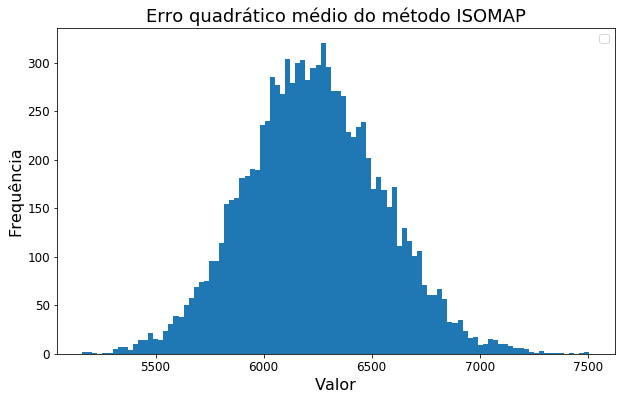

In [122]:
params = {'figure.figsize': [10, 6], 
          'axes.labelsize': 16,
          'axes.titlesize':18, 
          'font.size': 16,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 12
         }

plt.rcParams.update(params)

# Mean squared graph
plt.hist(mean_squared_error_isomap, bins=100)
plt.legend()
plt.title('Erro quadrático médio do método ISOMAP')
plt.xlabel('Valor')
plt.ylabel('Frequência')

No handles with labels found to put in legend.


Text(0, 0.5, 'Frequência')

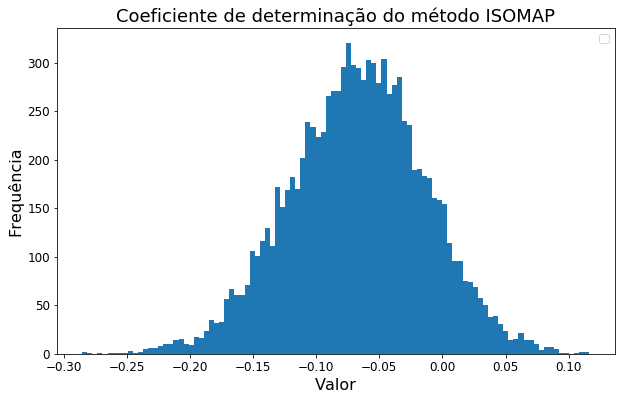

In [123]:
params = {'figure.figsize': [10, 6], 
          'axes.labelsize': 16,
          'axes.titlesize':18, 
          'font.size': 16,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 12
         }

plt.rcParams.update(params)

# R2 score graph
plt.hist(r2_score_isomap, bins=100)
plt.legend()
plt.title('Coeficiente de determinação do método ISOMAP')
plt.xlabel('Valor')
plt.ylabel('Frequência')

#### TSNE

In [124]:
mean_squared_error_tsne = []
r2_score_tsne = []

for i in range(1, 10000):    
    X_train_tsne, X_test_tsne, y_train_tsne, y_test_tsne = train_test_split(X_tsne, Y, test_size=0.20)    
    LR.fit(X_train_tsne, y_train_tsne)
    
    y_pred_tsne = LR.predict(X_test_tsne)
    
    mean_squared_error_tsne.append(mean_squared_error(y_test, y_pred_tsne))
    r2_score_tsne.append(r2_score(y_test, y_pred_tsne))

In [125]:
min(mean_squared_error_tsne)

5181.138499418913

In [126]:
min(r2_score_tsne)

-0.48688275767860256

In [127]:
max(mean_squared_error_tsne)

8685.226642828637

In [128]:
max(r2_score_tsne)

0.11300581818532873

In [129]:
statistics.mean(mean_squared_error_tsne)

6710.755959809303

In [130]:
statistics.mean(r2_score_tsne)

-0.14885975207892427

In [131]:
statistics.stdev(mean_squared_error_tsne)

477.09214871245325

In [132]:
statistics.stdev(r2_score_tsne)

0.08167663538522801

No handles with labels found to put in legend.


Text(0, 0.5, 'Frequência')

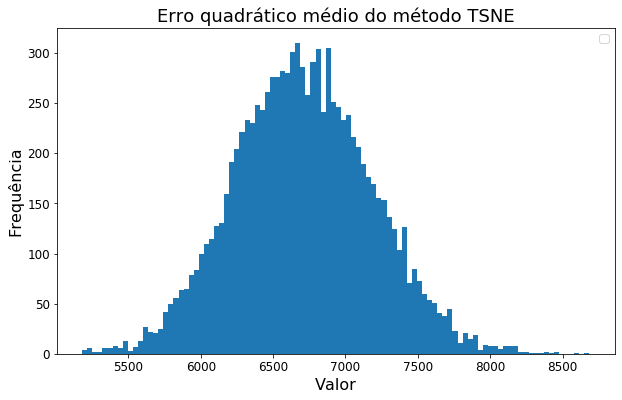

In [133]:
params = {'figure.figsize': [10, 6], 
          'axes.labelsize': 16,
          'axes.titlesize':18, 
          'font.size': 16,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 12
         }

plt.rcParams.update(params)

# Mean squared graph
plt.hist(mean_squared_error_tsne, bins=100)
plt.legend()
plt.title('Erro quadrático médio do método TSNE')
plt.xlabel('Valor')
plt.ylabel('Frequência')

No handles with labels found to put in legend.


Text(0, 0.5, 'Frequência')

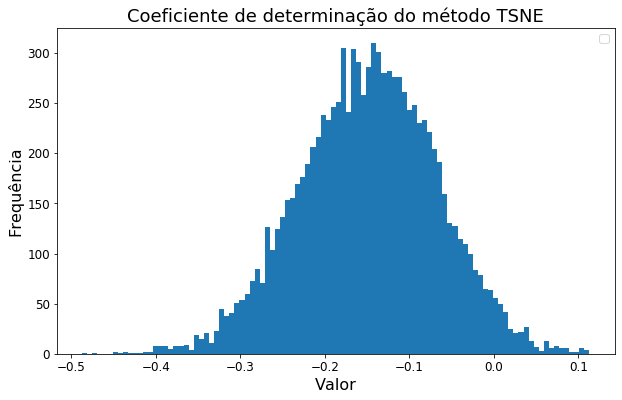

In [134]:
params = {'figure.figsize': [10, 6], 
          'axes.labelsize': 16,
          'axes.titlesize':18, 
          'font.size': 16,
          'legend.fontsize': 12, 
          'xtick.labelsize': 12, 
          'ytick.labelsize': 12
         }

plt.rcParams.update(params)

# R2 score graph
plt.hist(r2_score_tsne, bins=100)
plt.legend()
plt.title('Coeficiente de determinação do método TSNE')
plt.xlabel('Valor')
plt.ylabel('Frequência')

### Comparando modelos de Regressão

Exiba o gráfico de dispersão dos dados de teste e a curva de regressão gerada em cada caso.

#### Least Squares

In [140]:
LR.fit(X_train_ica, y_train_ica)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

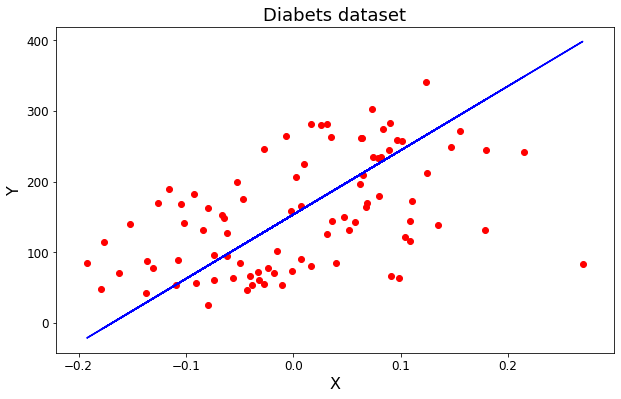

In [142]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, LR.predict(X_test), color = 'blue')
plt.title('Diabets dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Ridge

In [138]:
from sklearn.linear_model import Ridge

In [139]:
rd = Ridge()

In [143]:
rd.fit(X_train_ica, y_train_ica )

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

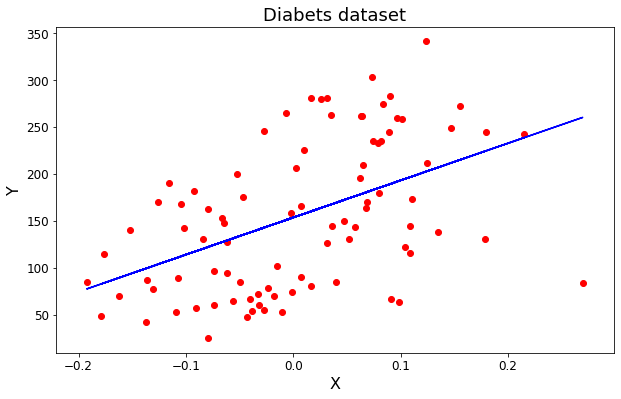

In [144]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, rd.predict(X_test), color = 'blue')
plt.title('Diabets dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Lasso

In [145]:
from sklearn.linear_model import Lasso

In [146]:
LS = Lasso()

In [148]:
LS.fit(X_train_ica, y_train_ica)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

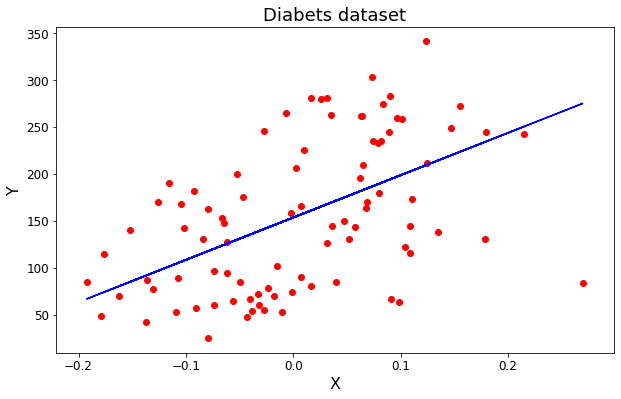

In [154]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, LS.predict(X_test), color = 'blue')
plt.title('Diabets dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Lasso LARS

In [155]:
from sklearn.linear_model import LassoLars

In [156]:
LSL = LassoLars()

In [157]:
LSL.fit(X_train_ica, y_train_ica)

LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, positive=False,
          precompute='auto', verbose=False)

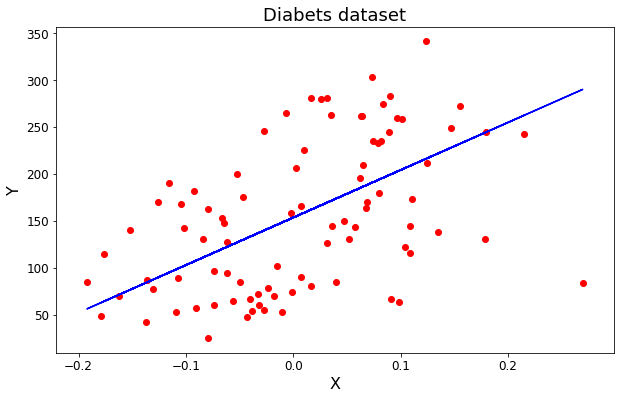

In [158]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, LSL.predict(X_test), color = 'blue')
plt.title('Diabets dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Bayesian Ridge

In [159]:
from sklearn.linear_model import BayesianRidge

In [160]:
BR = BayesianRidge()

In [161]:
BR.fit(X_train_ica, y_train_ica)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

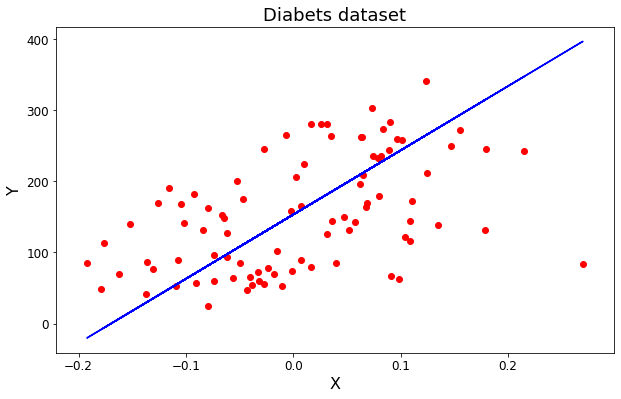

In [162]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, BR.predict(X_test), color = 'blue')
plt.title('Diabets dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### RANSAC

In [165]:
from sklearn.linear_model import RANSACRegressor

In [166]:
RSC = RANSACRegressor()

In [167]:
RSC.fit(X_train_ica, y_train_ica)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

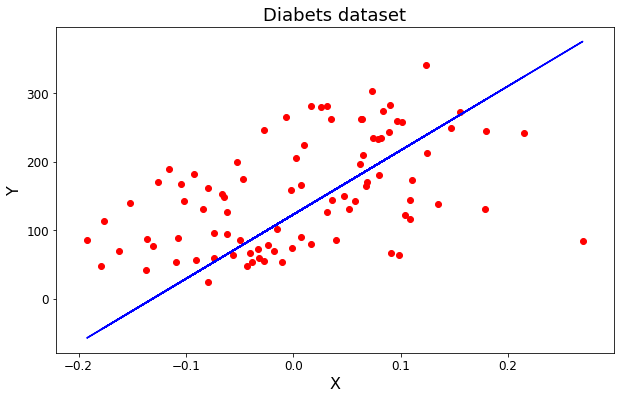

In [172]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, RSC.predict(X_test), color = 'blue')
plt.title('Diabets dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### Theil-Sen

In [169]:
from sklearn.linear_model import TheilSenRegressor

In [170]:
TSR = TheilSenRegressor()

In [171]:
TSR.fit(X_train_ica, y_train_ica)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
                  max_subpopulation=10000, n_jobs=None, n_subsamples=None,
                  random_state=None, tol=0.001, verbose=False)

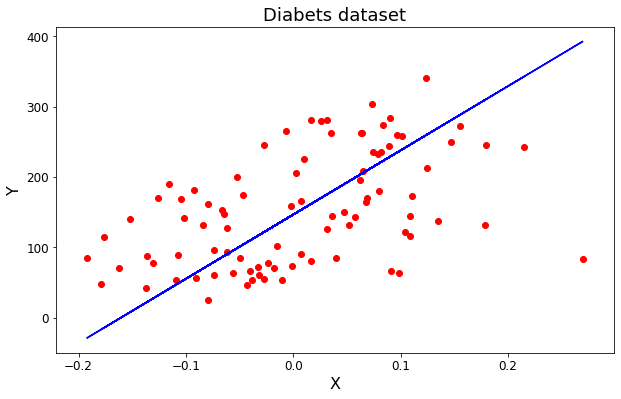

In [173]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, TSR.predict(X_test), color = 'blue')
plt.title('Diabets dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Gráfico geral comparativo

Em uma mesma figura, mostre novamente o gráfico de dispersão dos dados e plote cada um dos modelos gerados utilizando cada técnica deste laboratório. Atente-se a fazer com que o gráfico seja suficientemente autoexplicativo, então utilize diferentes cores, insira uma legenda etc.

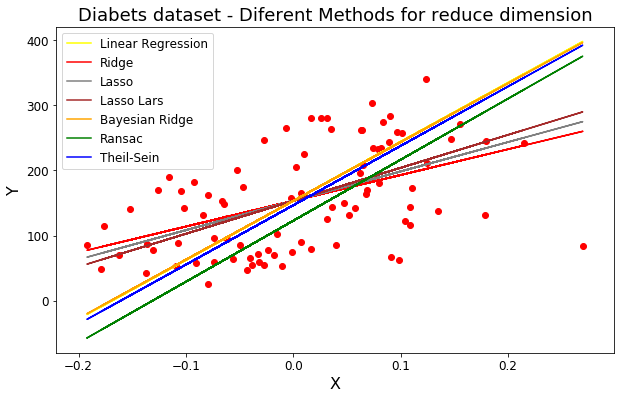

In [177]:
labels = ['Linear Regression', 'Ridge', 'Lasso', 'Lasso Lars', 'Bayesian Ridge', 'Ransac', 'Theil-Sein']

plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, LR.predict(X_test), color = 'yellow')
plt.plot(X_test, rd.predict(X_test), color = 'red')
plt.plot(X_test, LS.predict(X_test), color = 'gray')
plt.plot(X_test, LSL.predict(X_test), color = 'brown')
plt.plot(X_test, BR.predict(X_test), color = 'orange')
plt.plot(X_test, RSC.predict(X_test), color = 'green')
plt.plot(X_test, TSR.predict(X_test), color = 'blue')
plt.title('Diabets dataset - Diferent Methods for reduce dimension')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(labels)
plt.show()